In [23]:
import pandas as pd
import numpy as np
from lazypredict.Supervised import LazyRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X_train = pd.read_csv('/workspaces/ML-Algorithm/data/processed/X_train.csv')
X_train.head(3)

,age,job,marital,education,default,contact,month,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,-0.60,-1.00,1.00,-0.40,0.00,0.00,-0.67,-0.76,3.00,0.00,0.00,-0.91,-0.93,-0.70,-0.98,-0.71
1,-0.20,-0.50,1.00,0.60,0.00,-1.00,-0.67,-0.20,-0.50,0.00,0.00,0.00,0.27,0.86,0.00,0.00
2,0.80,0.00,0.00,-0.60,0.00,0.00,-0.33,-0.20,1.00,1.00,1.00,-0.87,0.33,0.32,-1.13,-1.55


In [3]:
X_test = pd.read_csv('/workspaces/ML-Algorithm/data/processed/X_test.csv')
X_test.head(3)

,age,job,marital,education,default,contact,month,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,-0.53,-1.00,1.00,-0.40,0.00,0.00,-0.67,0.37,0.00,0.00,0.00,-0.91,-1.07,-0.70,-0.97,-0.71
1,0.33,1.50,0.00,0.60,0.00,0.00,1.00,-0.56,-0.50,1.00,1.00,-0.38,-0.74,-0.03,-0.20,0.04
2,-0.93,0.00,0.00,0.00,0.00,0.00,2.00,-0.01,-0.50,0.00,0.00,-0.91,-0.87,-0.84,-0.95,-0.71


In [4]:
y_train = pd.read_csv('/workspaces/ML-Algorithm/data/processed/y_train.csv')
y_train.head(3)

,y
0,0
1,0
2,0


In [5]:
y_test = pd.read_csv('/workspaces/ML-Algorithm/data/processed/y_test.csv')
y_test.head(3)

,y
0,0
1,0
2,0


In [6]:
reg = LazyRegressor()
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

  0%|          | 0/42 [00:00<?, ?it/s]

100%|██████████| 42/42 [24:59<00:00, 35.71s/it]   

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002758 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 32938, number of used features: 16
[LightGBM] [Info] Start training from score 0.113425


In [7]:
print(models)

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
GradientBoostingRegressor                    0.41       0.41  0.24        3.52
LGBMRegressor                                0.40       0.40  0.24        0.25
HistGradientBoostingRegressor                0.39       0.40  0.24        0.39
MLPRegressor                                 0.39       0.39  0.24        4.64
RandomForestRegressor                        0.38       0.38  0.25        8.71
XGBRegressor                                 0.36       0.36  0.25        0.35
ExtraTreesRegressor                          0.36       0.36  0.25        4.17
BaggingRegressor                             0.33       0.33  0.26        0.92
BayesianRidge                                0.31       0.32  0.26        0.15
ElasticNetCV                                 0.31       0.32  0.26        0.47
LassoCV                                      0.31   

In [9]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

La intercepción representa el valor de la función logística cuando todas las características son cero.

In [14]:
print(f"Intercep (a): {model.intercept_}")

Intercep (a): [-3.89177816]


Los coeficientes representan cómo cambia la probabilidad de la variable objetivo (en este caso, la clase) con respecto a cada característica.

In [15]:
print(f"Coefficients: {model.coef_}")

Coefficients: [[ 0.03288247  0.03817485  0.06261368  0.21131101 -0.38460684  0.81190412
   0.20177318  1.01634391 -0.07218073 -0.30792211  0.68639434 -2.77833852
   1.24163855  0.39976012  0.08089298 -0.12029892]]


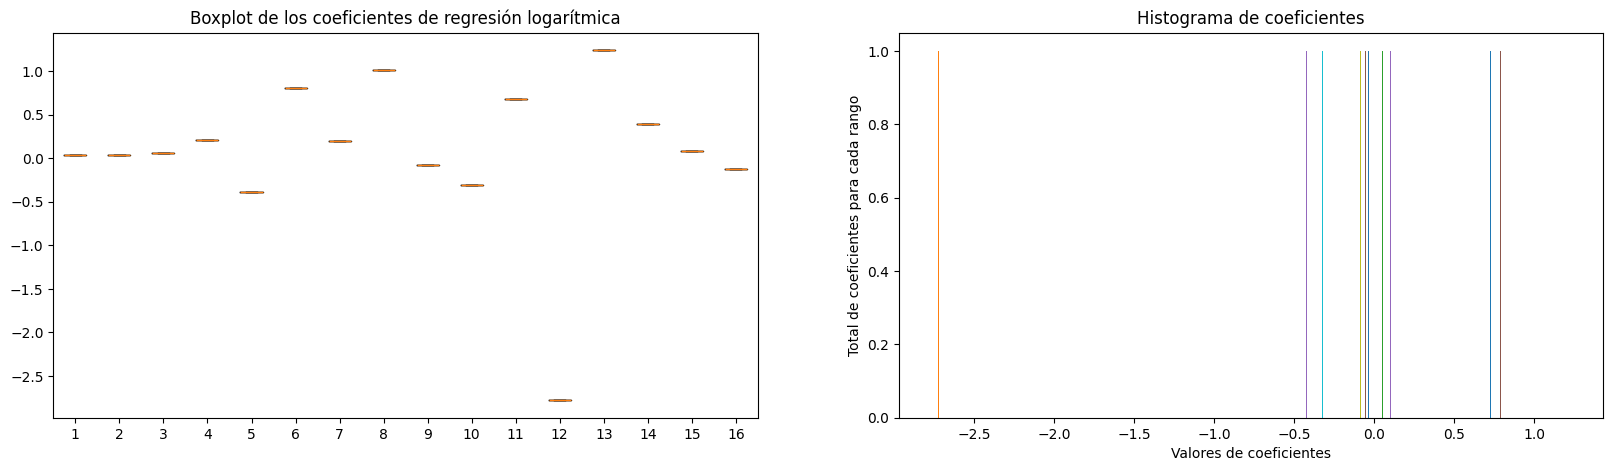

In [18]:
# Graficamos los coeficientes calculados
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.boxplot(model.coef_)
plt.title('Boxplot de los coeficientes de regresión logarítmica')
plt.subplot(1, 2, 2)
plt.hist(model.coef_,50)
plt.xlabel('Valores de coeficientes')
plt.ylabel('Total de coeficientes para cada rango')
plt.title('Histograma de coeficientes')
plt.show()

- Intercepto (a): -3.89177816.

Este valor representa el logaritmo de la odds de que la respuesta sea positiva cuando todas las características son cero. Si todas las características son cero, la probabilidad de pertenecer a la clase positiva es 
1 / (1 + 𝑒 (exp. −3.89177816)), lo cual es bastante bajo.

- Coeficientes:

X1: 0.03288247. Un aumento unitario en la característica X1 está asociado con un aumento de aproximadamente 0.03288 en el logaritmo de la odds de pertenecer a la clase positiva.

X2: 0.03817485. Un aumento unitario en la característica X2 está asociado con un aumento de aproximadamente 0.03817 en el logaritmo de la odds de pertenecer a la clase positiva.

X3: 0.06261368. Y así sucesivamente para cada característica.

- Signo de los coeficientes:

una característica con un coeficiente positivo contribuye positivamente a la probabilidad de pertenecer a la clase positiva, mientras que una característica con un coeficiente negativo contribuye negativamente.

Las características con coeficientes mayores en magnitud tienen un impacto más fuerte en la predicción.


In [10]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

Accuracy: 0.9085610200364299
MSE: 0.09143897996357013
R2 Score: 0.06341246581226789


Exploración métricas de rendimiento del modelo:

In [20]:
def get_metrics(yhat_test, y_test, yhat_train, y_train):
    # Calcula todas las métricas para el conjunto de entrenamiento
    r2_train = r2_score(y_train, yhat_train)
    mse_train = mean_squared_error(y_train, yhat_train)
    mae_train = mean_absolute_error(y_train, yhat_train)
    medae_train = median_absolute_error(y_train, yhat_train)
    rmse_train = mean_squared_error(y_train, yhat_train, squared=False)
    
    # Calcula todas las métricas para el conjunto de prueba
    r2_test = r2_score(y_test, yhat_test)
    mse_test = mean_squared_error(y_test, yhat_test)
    mae_test = mean_absolute_error(y_test, yhat_test)
    medae_test = median_absolute_error(y_test, yhat_test)
    rmse_test = mean_squared_error(y_test, yhat_test, squared=False)
    
    # Calcula la diferencia entre las métricas de entrenamiento y prueba
    r2_diff = r2_train - r2_test
    mse_diff = mse_train - mse_test
    mae_diff = mae_train - mae_test
    medae_diff = medae_train - medae_test
    rmse_diff = rmse_train - rmse_test
    
    # Crea el DataFrame con todas las métricas
    metrics_data = {
        'R2': [r2_train, r2_test, r2_diff],
        'MSE': [mse_train, mse_test, mse_diff],
        'MAE': [mae_train, mae_test, mae_diff],
        'MedAE': [medae_train, medae_test, medae_diff],
        'RMSE': [rmse_train, rmse_test, rmse_diff]
    }
    
    return pd.DataFrame(data=metrics_data, index=['Train set', 'Test set', 'Difference'])

In [21]:
yhat_train = model.predict(X_train)
yhat_test = model.predict(X_test)

In [22]:
get_metrics(yhat_test, y_test, yhat_train, y_train)

,R2,MSE,MAE,MedAE,RMSE
Train set,0.08,0.09,0.09,0.00,0.30
Test set,0.06,0.09,0.09,0.00,0.30
Difference,0.02,0.00,0.00,0.00,0.00


- Exactitud (Accuracy): La exactitud del modelo es del 90.86%. Esto significa que el modelo clasifica correctamente el 90.86% de las muestras del conjunto de prueba.

- R2 Score: El R2 Score para el conjunto de entrenamiento es 0.08 y para el conjunto de prueba es 0.06. El R2 Score mide la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes. Un valor de 0.08 para el conjunto de entrenamiento indica que el modelo explica aproximadamente el 8% de la varianza en los datos de entrenamiento, mientras que un valor de 0.06 para el conjunto de prueba indica que explica aproximadamente el 6% de la varianza en los datos de prueba.

- Error cuadrático medio (MSE): El MSE para ambos conjuntos, entrenamiento y prueba, es 0.09. El MSE es una medida de la calidad de la predicción del modelo. Un MSE más bajo indica un mejor ajuste del modelo a los datos.

- Error absoluto medio (MAE): Tanto para el conjunto de entrenamiento como para el conjunto de prueba, el MAE es 0.09. El MAE es la diferencia promedio entre las predicciones del modelo y los valores verdaderos. Un MAE más bajo indica una mejor precisión del modelo.

- Mediana del error absoluto (MedAE): El MedAE es 0.00 tanto para el conjunto de entrenamiento como para el conjunto de prueba. El MedAE es la mediana de los errores absolutos entre las predicciones del modelo y los valores verdaderos.

- Raíz del error cuadrático medio (RMSE): El RMSE para ambos conjuntos, entrenamiento y prueba, es 0.30. El RMSE es una medida de la dispersión de las predicciones del modelo. Un RMSE más bajo indica un mejor ajuste del modelo a los datos.

En resumen, el modelo parece tener un rendimiento limitado en términos de explicar la variabilidad en la variable objetivo, como lo sugieren los valores de R2 Score bajos.

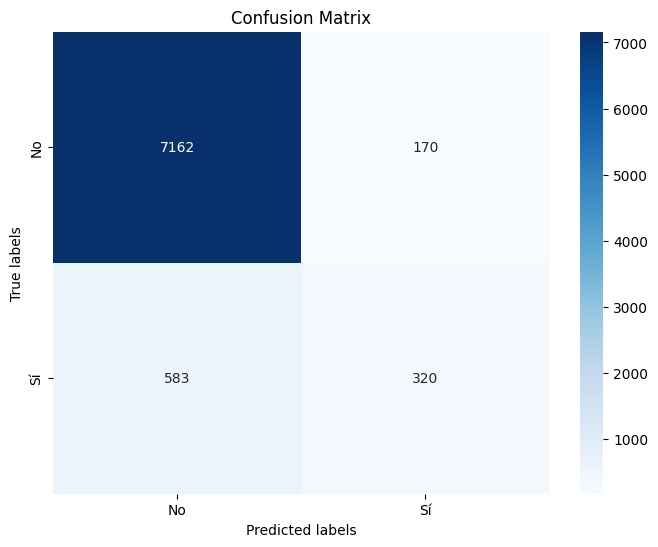

In [25]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['No', 'Sí'], yticklabels=['No', 'Sí'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

La matriz de confusión proporciona una visión detallada del rendimiento del modelo al clasificar las instancias en cada una de las clases. 

Interpretación de la matriz de confusión:

- Verdaderos positivos (TP): 7162 instancias fueron correctamente clasificadas como positivas (clase 1).
- Falsos negativos (FN): 170 instancias fueron incorrectamente clasificadas como negativas cuando en realidad son positivas.
- Falsos positivos (FP): 583 instancias fueron incorrectamente clasificadas como positivas cuando en realidad son negativas.
- Verdaderos negativos (TN): 320 instancias fueron correctamente clasificadas como negativas (clase 0).

Hay buen número de verdaderos positivos, lo que indica que el modelo puede clasificar correctamente muchas instancias de la clase positiva, pero también tienes una cantidad significativa de falsos positivos, lo que sugiere que el modelo puede estar cometiendo errores al clasificar instancias negativas como positivas.